<a href="https://colab.research.google.com/github/UttaraKet1607/Hindi-Character-Recognition/blob/main/Final_CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! unzip "training.zip"

In [2]:
import os
import shutil
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

## Creating a Validation Set

In [3]:
os.mkdir('validation')
os.mkdir('./validation/background')
os.mkdir('./validation/hi')

In [4]:
#finding total number of files in each class
bg_imgs = os.listdir('./training/background') 
hi_imgs = os.listdir('./training/hi')
print(len(bg_imgs))
print(len(hi_imgs))
# ? class imbalance 

4450
1425


In [5]:
validation_imgs = bg_imgs[3115:] #30% of 4450
len(validation_imgs)
for f in validation_imgs:
  shutil.move(os.path.join('./training/background',f),'./validation/background')

In [6]:
validation_imgs = hi_imgs[997:] #30% of 1425
len(validation_imgs)
for f in validation_imgs:
  shutil.move(os.path.join('./training/hi',f),'./validation/hi')

## Data Preparation

In [7]:
generator = image.ImageDataGenerator(rescale=1./255, rotation_range=40,       
      width_shift_range=0.2,   
      height_shift_range=0.2,  
      shear_range=0.2,         
      zoom_range=0.2,           
      horizontal_flip=True,    
      fill_mode="nearest")
train_datagen = generator.flow_from_directory('./training',target_size=(64,64),classes=['background','hi'],class_mode='binary',batch_size=20)
test_datagen = generator.flow_from_directory('./validation',target_size=(64,64),classes=['background','hi'],class_mode='binary',batch_size=20)


Found 4112 images belonging to 2 classes.
Found 1763 images belonging to 2 classes.


## Model Building

In [25]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = "relu", input_shape=(64,64,3)))
model.add(MaxPool2D((2,2), padding = "same"))
model.add(Conv2D(32, (3,3), activation = "relu", input_shape=(64,64,3)))
model.add(MaxPool2D((2,2), padding = "same"))
model.add(Conv2D(32, (3,3), activation = "relu", input_shape=(64,64,3)))
model.add(MaxPool2D((2,2), padding = "same"))
model.add(Conv2D(32, (3,3), activation = "relu", input_shape=(64,64,3)))
model.add(MaxPool2D((2,2), padding = "same"))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation= "relu"))
model.add(Dense(128, activation= "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [26]:
model.compile(loss="binary_crossentropy",metrics=["accuracy"],optimizer="adam")

In [27]:
history = model.fit(train_datagen,epochs=50,validation_data=test_datagen, batch_size=30)

Epoch 1/50
206/206 [==============================] - 12s 57ms/step - loss: 0.4958 - accuracy: 0.7875 - val_loss: 0.3750 - val_accuracy: 0.8349
Epoch 2/50
206/206 [==============================] - 11s 56ms/step - loss: 0.3093 - accuracy: 0.8769 - val_loss: 0.2798 - val_accuracy: 0.8951
Epoch 3/50
206/206 [==============================] - 11s 55ms/step - loss: 0.2768 - accuracy: 0.8923 - val_loss: 0.2181 - val_accuracy: 0.9132
Epoch 4/50
206/206 [==============================] - 11s 55ms/step - loss: 0.2142 - accuracy: 0.9183 - val_loss: 0.1663 - val_accuracy: 0.9399
Epoch 5/50
206/206 [==============================] - 11s 55ms/step - loss: 0.1966 - accuracy: 0.9285 - val_loss: 0.1568 - val_accuracy: 0.9370
Epoch 6/50
206/206 [==============================] - 11s 55ms/step - loss: 0.1745 - accuracy: 0.9365 - val_loss: 0.1517 - val_accuracy: 0.9495
Epoch 7/50
206/206 [==============================] - 11s 55ms/step - loss: 0.1739 - accuracy: 0.9351 - val_loss: 0.1494 - val_accuracy:

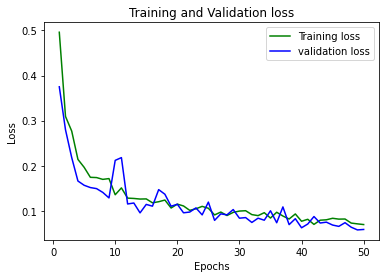

In [29]:
import matplotlib.pyplot as plt

loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

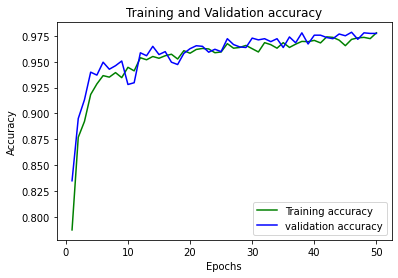

In [30]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
epochs = range(1,51)
plt.plot(epochs, accuracy_train, 'g', label='Training accuracy')
plt.plot(epochs, accuracy_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Model Testing

In [ ]:
! unzip "test.zip"

In [32]:
from PIL import Image
import numpy as np
result = {}
for filename in os.listdir('./test'):
      img = Image.open('./test/' + filename)
      img = np.array(img)
      ans = 1 if model.predict(np.array([img]))[0][0]==1.0 else 0
      result[filename] = ans

In [34]:
result

{'1.jpg': 1,
 '10.jpg': 0,
 '11.jpg': 1,
 '12.jpg': 0,
 '13.jpg': 1,
 '14.jpg': 0,
 '15.jpg': 1,
 '16.jpg': 0,
 '17.jpg': 0,
 '18.jpg': 0,
 '19.jpg': 1,
 '2.jpg': 0,
 '20.jpg': 1,
 '21.jpg': 1,
 '22.jpg': 1,
 '23.jpg': 1,
 '24.jpg': 1,
 '25.jpg': 1,
 '26.jpg': 1,
 '27.jpg': 0,
 '28.jpg': 1,
 '29.jpg': 1,
 '3.jpg': 1,
 '30.jpg': 1,
 '31.jpg': 0,
 '32.jpg': 0,
 '33.jpg': 0,
 '34.jpg': 0,
 '35.jpg': 1,
 '36.jpg': 0,
 '37.jpg': 0,
 '38.jpg': 0,
 '39.jpg': 0,
 '4.jpg': 0,
 '40.jpg': 1,
 '41.jpg': 0,
 '42.jpg': 1,
 '43.jpg': 1,
 '44.jpg': 0,
 '45.jpg': 0,
 '46.jpg': 1,
 '47.jpg': 0,
 '48.jpg': 1,
 '49.jpg': 0,
 '5.jpg': 1,
 '50.jpg': 1,
 '51.jpg': 1,
 '52.jpg': 1,
 '53.jpg': 1,
 '54.jpg': 1,
 '55.jpg': 0,
 '56.jpg': 0,
 '57.jpg': 0,
 '58.jpg': 0,
 '59.jpg': 0,
 '6.jpg': 0,
 '60.jpg': 0,
 '61.jpg': 1,
 '62.jpg': 1,
 '63.jpg': 1,
 '64.jpg': 0,
 '65.jpg': 0,
 '66.jpg': 0,
 '67.jpg': 1,
 '68.jpg': 0,
 '69.jpg': 1,
 '7.jpg': 1,
 '70.jpg': 1,
 '71.jpg': 1,
 '72.jpg': 0,
 '73.jpg': 1,
 '74.jpg': 0,

# Creating Sample Output

In [35]:
import random
import json
# from utils.io import write_json

def write_json(filename, result):
    with open(filename, 'w') as outfile:
        json.dump(result, outfile)

def read_json(filename):
    with open(filename, 'r') as outfile:
        data =  json.load(outfile)
    return data

def generate_sample_file(filename):
    res = {}
    for i in range(1,99):
        test_set = str(i) + '.jpg'
        res[test_set] = result[test_set]
    write_json(filename, res)

if __name__ == '__main__':
    generate_sample_file('./sample_result1.json')